<a href="https://colab.research.google.com/github/msudhanshu10/Data-Science/blob/master/BCG_Virtual_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Load data set

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving ml_case_training_data.csv to ml_case_training_data.csv
Saving ml_case_training_hist_data.csv to ml_case_training_hist_data.csv
Saving ml_case_training_output.csv to ml_case_training_output.csv


In [ ]:
df1= pd.read_csv('ml_case_training_data.csv')
df2= pd.read_csv('ml_case_training_hist_data.csv')
df3= pd.read_csv('ml_case_training_output.csv')

In [ ]:
df1.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [ ]:
df1.shape

(16096, 32)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [ ]:
df=pd.concat([df1,df3], axis=1)

# 2. Data Cleaning

In [ ]:
# Separating numeric and non_numeric features
df_numeric= df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['campaign_disc_ele' 'cons_12m' 'cons_gas_12m' 'cons_last_month'
 'forecast_base_bill_ele' 'forecast_base_bill_year' 'forecast_bill_12m'
 'forecast_cons' 'forecast_cons_12m' 'forecast_cons_year'
 'forecast_discount_energy' 'forecast_meter_rent_12m'
 'forecast_price_energy_p1' 'forecast_price_energy_p2'
 'forecast_price_pow_p1' 'imp_cons' 'margin_gross_pow_ele'
 'margin_net_pow_ele' 'nb_prod_act' 'net_margin' 'num_years_antig'
 'pow_max' 'churn']


In [ ]:
df_non_numeric= df.select_dtypes(exclude=[np.number])
non_numeric_cols= df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'activity_new' 'channel_sales' 'date_activ' 'date_end'
 'date_first_activ' 'date_modif_prod' 'date_renewal' 'has_gas' 'origin_up'
 'id']


In [ ]:
df['churn'].value_counts()

0    14501
1     1595
Name: churn, dtype: int64

## 2.1 Upscaling of data

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority= df[df['churn']==0]
df_minority= df[df['churn']==1]

df_minority_upsampled= resample(df_minority, replace=True, n_samples=14501, random_state=101)

df_upsampled= pd.concat([df_majority, df_minority_upsampled])
df_upsampled['churn'].value_counts()

1    14501
0    14501
Name: churn, dtype: int64

## 2.2 Handling Missing Values

> Indented block



<Figure size 1080x720 with 0 Axes>

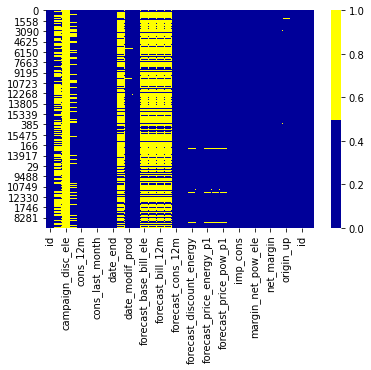

<Figure size 1080x720 with 0 Axes>

In [ ]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_upsampled.isnull(), cmap=sns.color_palette(colours))
plt.figure(figsize=(15,10))

In [ ]:
df1= df_upsampled.drop('churn', axis=1)
df3= df_upsampled['churn']

In [ ]:
df1.shape

(29002, 33)

In [ ]:
miss_col=[]
for col in df1.columns:
  val= np.round((df1[col].isnull().sum()/29002)*100)
  print(col, ':', np.round((df1[col].isnull().sum()/29002)*100), '%')

id : id    0.0
id    0.0
dtype: float64 %
activity_new : 59.0 %
campaign_disc_ele : 100.0 %
channel_sales : 24.0 %
cons_12m : 0.0 %
cons_gas_12m : 0.0 %
cons_last_month : 0.0 %
date_activ : 0.0 %
date_end : 0.0 %
date_first_activ : 73.0 %
date_modif_prod : 1.0 %
date_renewal : 0.0 %
forecast_base_bill_ele : 73.0 %
forecast_base_bill_year : 73.0 %
forecast_bill_12m : 73.0 %
forecast_cons : 73.0 %
forecast_cons_12m : 0.0 %
forecast_cons_year : 0.0 %
forecast_discount_energy : 2.0 %
forecast_meter_rent_12m : 0.0 %
forecast_price_energy_p1 : 2.0 %
forecast_price_energy_p2 : 2.0 %
forecast_price_pow_p1 : 2.0 %
has_gas : 0.0 %
imp_cons : 0.0 %
margin_gross_pow_ele : 0.0 %
margin_net_pow_ele : 0.0 %
nb_prod_act : 0.0 %
net_margin : 0.0 %
num_years_antig : 0.0 %
origin_up : 0.0 %
pow_max : 0.0 %
id : id    0.0
id    0.0
dtype: float64 %


In [ ]:
df1.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,id
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,48ada52261e7cf58715202705a0451c9
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,d29c2c54acc38ff3c0614d0a653813dd
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,764c75f661154dac3a6c254cd082ea7d
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,bba03439a292a1e166f80264c16191cb
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2010-04-08,2015-04-12,1399.83,1399.83,14559.74,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,568bb38a1afd7c0fc49c77b3789b59a3


In [ ]:
df1.nunique()

id                          16096
activity_new                  419
campaign_disc_ele               0
channel_sales                   7
cons_12m                    12002
cons_gas_12m                 2290
cons_last_month              5308
date_activ                   1961
date_end                      371
date_first_activ             1133
date_modif_prod              2307
date_renewal                  398
forecast_base_bill_ele       2042
forecast_base_bill_year      2042
forecast_bill_12m            3429
forecast_cons                1955
forecast_cons_12m           15422
forecast_cons_year           4895
forecast_discount_energy       14
forecast_meter_rent_12m      3938
forecast_price_energy_p1      617
forecast_price_energy_p2      412
forecast_price_pow_p1          46
has_gas                         2
imp_cons                     8765
margin_gross_pow_ele         2979
margin_net_pow_ele           3006
nb_prod_act                    11
net_margin                  13189
num_years_anti

In [ ]:
miss_col=['activity_new', 'campaign_disc_ele', 'channel_sales', 'date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']
df1.drop(miss_col, axis=1).shape

(29002, 25)

In [ ]:
df1.drop(miss_col, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29002 entries, 0 to 4419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        29002 non-null  object 
 1   cons_12m                  29002 non-null  int64  
 2   cons_gas_12m              29002 non-null  int64  
 3   cons_last_month           29002 non-null  int64  
 4   date_activ                29002 non-null  object 
 5   date_end                  29000 non-null  object 
 6   date_modif_prod           28649 non-null  object 
 7   date_renewal              28962 non-null  object 
 8   forecast_cons_12m         29002 non-null  float64
 9   forecast_cons_year        29002 non-null  int64  
 10  forecast_discount_energy  28491 non-null  float64
 11  forecast_meter_rent_12m   29002 non-null  float64
 12  forecast_price_energy_p1  28491 non-null  float64
 13  forecast_price_energy_p2  28491 non-null  float64
 14  forecas

<Figure size 1080x720 with 0 Axes>

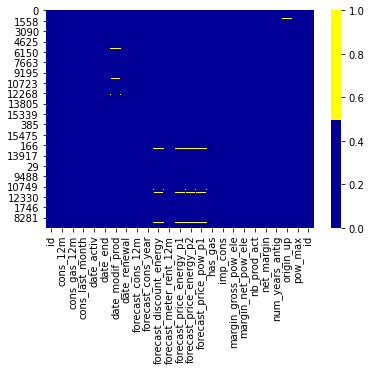

<Figure size 1080x720 with 0 Axes>

In [ ]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1.drop(miss_col, axis=1).isnull(), cmap=sns.color_palette(colours))
plt.figure(figsize=(15,10))

In [ ]:
for col in df1.drop(miss_col, axis=1).columns:
  print(col, ':', np.round((df1.drop(miss_col, axis=1)[col].isnull().sum()/29002)*100), '%')

id : id    0.0
id    0.0
dtype: float64 %
cons_12m : 0.0 %
cons_gas_12m : 0.0 %
cons_last_month : 0.0 %
date_activ : 0.0 %
date_end : 0.0 %
date_modif_prod : 1.0 %
date_renewal : 0.0 %
forecast_cons_12m : 0.0 %
forecast_cons_year : 0.0 %
forecast_discount_energy : 2.0 %
forecast_meter_rent_12m : 0.0 %
forecast_price_energy_p1 : 2.0 %
forecast_price_energy_p2 : 2.0 %
forecast_price_pow_p1 : 2.0 %
has_gas : 0.0 %
imp_cons : 0.0 %
margin_gross_pow_ele : 0.0 %
margin_net_pow_ele : 0.0 %
nb_prod_act : 0.0 %
net_margin : 0.0 %
num_years_antig : 0.0 %
origin_up : 0.0 %
pow_max : 0.0 %
id : id    0.0
id    0.0
dtype: float64 %


In [ ]:
df1.drop(miss_col, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.shape

(29002, 25)

In [ ]:
df= pd.concat([df1,df3], axis=1)

In [ ]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,id,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,48ada52261e7cf58715202705a0451c9,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,bba03439a292a1e166f80264c16191cb,0
5,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,568bb38a1afd7c0fc49c77b3789b59a3,0


In [ ]:
df.isna().sum()

id                            0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             353
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    511
forecast_meter_rent_12m       0
forecast_price_energy_p1    511
forecast_price_energy_p2    511
forecast_price_pow_p1       511
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                   134
pow_max                       3
id                            0
churn                         0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df1=df.drop('churn', axis=1, inplace=False)

In [ ]:
df3=df['churn']

In [ ]:
df1.shape

(27958, 25)

In [ ]:
df3.shape

(27958,)

In [ ]:
df3.value_counts()

0    14154
1    13804
Name: churn, dtype: int64

In [ ]:
df.duplicated().sum()

12284

No Duplicate Value :)

In [ ]:
df['churn'].value_counts()

0    14154
1    13804
Name: churn, dtype: int64

In [ ]:
df.nunique()

id                          15674
cons_12m                    11745
cons_gas_12m                 2226
cons_last_month              5228
date_activ                   1943
date_end                      367
date_modif_prod              2297
date_renewal                  396
forecast_cons_12m           15024
forecast_cons_year           4813
forecast_discount_energy       14
forecast_meter_rent_12m      3841
forecast_price_energy_p1      612
forecast_price_energy_p2      409
forecast_price_pow_p1          46
has_gas                         2
imp_cons                     8555
margin_gross_pow_ele         2927
margin_net_pow_ele           2954
nb_prod_act                    11
net_margin                  12897
num_years_antig                15
origin_up                       5
pow_max                       842
id                          15674
churn                           2
dtype: int64

In [ ]:
df.dtypes

id                           object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
origin_up                    object
pow_max                     float64
id                           object
churn                         int64
dtype: object

In [ ]:
# separating numeric columns
df_numeric= df.select_dtypes(include=[np.number])
numeric_cols= df_numeric.columns.values
print(numeric_cols)

# separating non numeric columns
df_non_numeric= df.select_dtypes(exclude=[np.number])
non_numeric_cols= df_non_numeric.columns.values
print(non_numeric_cols)

['cons_12m' 'cons_gas_12m' 'cons_last_month' 'forecast_cons_12m'
 'forecast_cons_year' 'forecast_discount_energy' 'forecast_meter_rent_12m'
 'forecast_price_energy_p1' 'forecast_price_energy_p2'
 'forecast_price_pow_p1' 'imp_cons' 'margin_gross_pow_ele'
 'margin_net_pow_ele' 'nb_prod_act' 'net_margin' 'num_years_antig'
 'pow_max' 'churn']
['id' 'date_activ' 'date_end' 'date_modif_prod' 'date_renewal' 'has_gas'
 'origin_up' 'id']


In [ ]:
df_numeric.iloc[:,0:-1]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,831.80,-41.76,-41.76,1,1732.36,3,180.000
2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800
3,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856
4,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200
5,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1052.37,-3.18,-3.18,1,823.18,6,75.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097,18304,0,0,2726.62,0,0.0,9.62,0.144149,0.000000,44.311378,0.00,28.45,28.45,1,284.76,3,13.856
15012,32386,0,0,2385.59,0,0.0,15.24,0.144058,0.000000,44.311378,0.00,6.92,6.92,1,213.90,3,10.392
12945,-9457,0,0,-763.47,0,0.0,0.00,0.092453,0.086393,59.173468,0.00,0.00,0.00,1,0.00,6,30.000
1798,42004,0,6725,4177.56,6725,0.0,133.55,0.115174,0.098837,40.606701,655.94,15.12,15.12,2,456.18,11,16.500


## 2.3 Checking for feature importances

[0.08404025 0.02655076 0.06336496 0.07713222 0.05454048 0.004741
 0.07450099 0.07083781 0.04071875 0.02973016 0.05428213 0.09347209
 0.08796699 0.0287614  0.07995341 0.05647413 0.07293247]


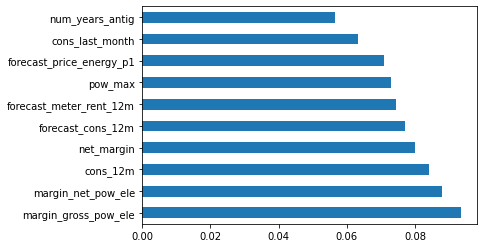

In [ ]:
X = df_numeric.iloc[:,0:-1]  #independent columns
y = df_numeric.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df_non_numeric.nunique()

id                 15674
date_activ          1943
date_end             367
date_modif_prod     2297
date_renewal         396
has_gas                2
origin_up              5
id                 15674
dtype: int64

Need to drop date columns and label encode has_gas and origin_up.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df['has_gas']= le.fit_transform(df['has_gas'])
df['origin_up']=le.fit_transform(df['origin_up'])

In [ ]:
df.dtypes

id                           object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                       int64
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
origin_up                     int64
pow_max                     float64
id                           object
churn                         int64
dtype: object

## 2.4 Removing Outliers

In [ ]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,2.795800e+04,2.795800e+04,2.795800e+04,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000
mean,1.475913e+05,2.148839e+04,1.450110e+04,2408.720292,1955.838257,1.088633,73.383353,0.135813,0.054604,43.548755,0.167358,200.403453,24.887497,23.723758,1.302597,232.364097,4.898956,2.310573,20.724503,0.493741
std,5.434913e+05,1.330177e+05,6.515676e+04,4241.570683,6696.677563,5.381003,83.258987,0.025982,0.048836,4.713564,0.373302,602.754959,26.534079,30.553498,1.170943,527.159235,1.641007,0.830403,20.363356,0.499970
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,0.000000,1.000000,0.000000
25%,5.924000e+03,0.000000e+00,0.000000e+00,509.817500,0.000000,0.000000,16.260000,0.115237,0.000000,40.606701,0.000000,0.000000,12.980000,12.820000,1.000000,52.130000,4.000000,2.000000,13.150000,0.000000
50%,1.536400e+04,0.000000e+00,8.280000e+02,1191.695000,376.000000,0.000000,19.780000,0.142819,0.086741,44.311378,0.000000,44.030000,22.760000,22.610000,1.000000,123.560000,5.000000,3.000000,13.856000,0.000000
75%,4.761300e+04,0.000000e+00,3.838000e+03,2734.000000,1973.750000,0.000000,131.760000,0.146120,0.098841,44.311378,0.000000,215.130000,31.530000,31.410000,1.000000,284.380000,6.000000,3.000000,20.000000,1.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,4.000000,500.000000,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text major ticklabel objects>)

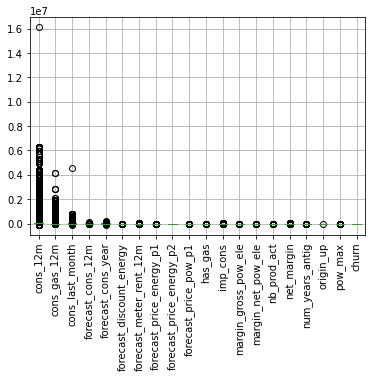

In [ ]:
df.boxplot()
plt.xticks(rotation=90)

In [ ]:
# separating numeric columns
df_numeric= df.select_dtypes(include=[np.number])
numeric_cols= df_numeric.columns.values
print(numeric_cols)

# separating non numeric columns
df_non_numeric= df.select_dtypes(exclude=[np.number])
non_numeric_cols= df_non_numeric.columns.values
print(non_numeric_cols)

['cons_12m' 'cons_gas_12m' 'cons_last_month' 'forecast_cons_12m'
 'forecast_cons_year' 'forecast_discount_energy' 'forecast_meter_rent_12m'
 'forecast_price_energy_p1' 'forecast_price_energy_p2'
 'forecast_price_pow_p1' 'has_gas' 'imp_cons' 'margin_gross_pow_ele'
 'margin_net_pow_ele' 'nb_prod_act' 'net_margin' 'num_years_antig'
 'origin_up' 'pow_max' 'churn']
['id' 'date_activ' 'date_end' 'date_modif_prod' 'date_renewal' 'id']


In [ ]:
from scipy import stats
df=df[(np.abs(stats.zscore(df_numeric)) < 3).all(axis=1)]

In [ ]:
df.shape

(23084, 26)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text major ticklabel objects>)

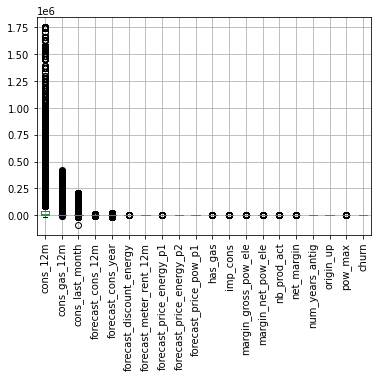

In [ ]:
df.boxplot()
plt.xticks(rotation=90)

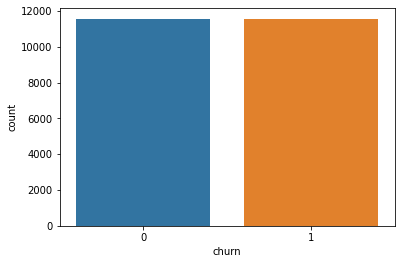

In [ ]:
sns.countplot(x=df['churn'])

In [ ]:
df.duplicated().sum()

10294

In [ ]:
df.drop_duplicates()['churn'].value_counts()

0    11521
1     1269
Name: churn, dtype: int64

In [ ]:
df_final= df.drop_duplicates()

In [ ]:
df_final.shape

(12790, 26)

In [ ]:
df_final['churn'].value_counts()

0    11521
1     1269
Name: churn, dtype: int64

# 3. Exploratory Data Analysis

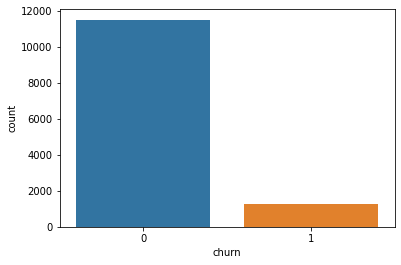

In [ ]:
sns.countplot(x=df_final['churn'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12790 entries, 2 to 1925
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        12790 non-null  object 
 1   cons_12m                  12790 non-null  int64  
 2   cons_gas_12m              12790 non-null  int64  
 3   cons_last_month           12790 non-null  int64  
 4   date_activ                12790 non-null  object 
 5   date_end                  12790 non-null  object 
 6   date_modif_prod           12790 non-null  object 
 7   date_renewal              12790 non-null  object 
 8   forecast_cons_12m         12790 non-null  float64
 9   forecast_cons_year        12790 non-null  int64  
 10  forecast_discount_energy  12790 non-null  float64
 11  forecast_meter_rent_12m   12790 non-null  float64
 12  forecast_price_energy_p1  12790 non-null  float64
 13  forecast_price_energy_p2  12790 non-null  float64
 14  forecas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


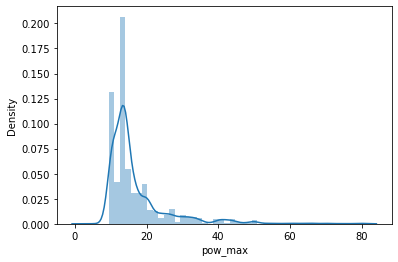

In [ ]:
sns.distplot(df_final['pow_max'])

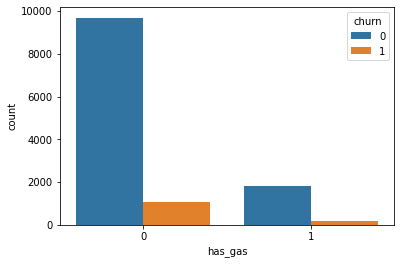

In [ ]:
sns.countplot(x=df_final['has_gas'],  hue=df_final['churn'])

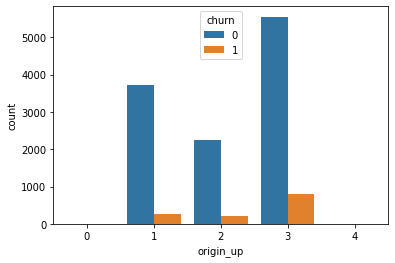

In [ ]:
sns.countplot(x=df_final['origin_up'], hue=df_final['churn'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


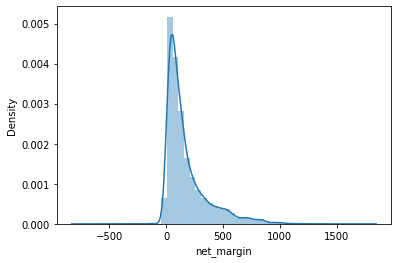

In [ ]:
sns.distplot(df_final['net_margin'])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

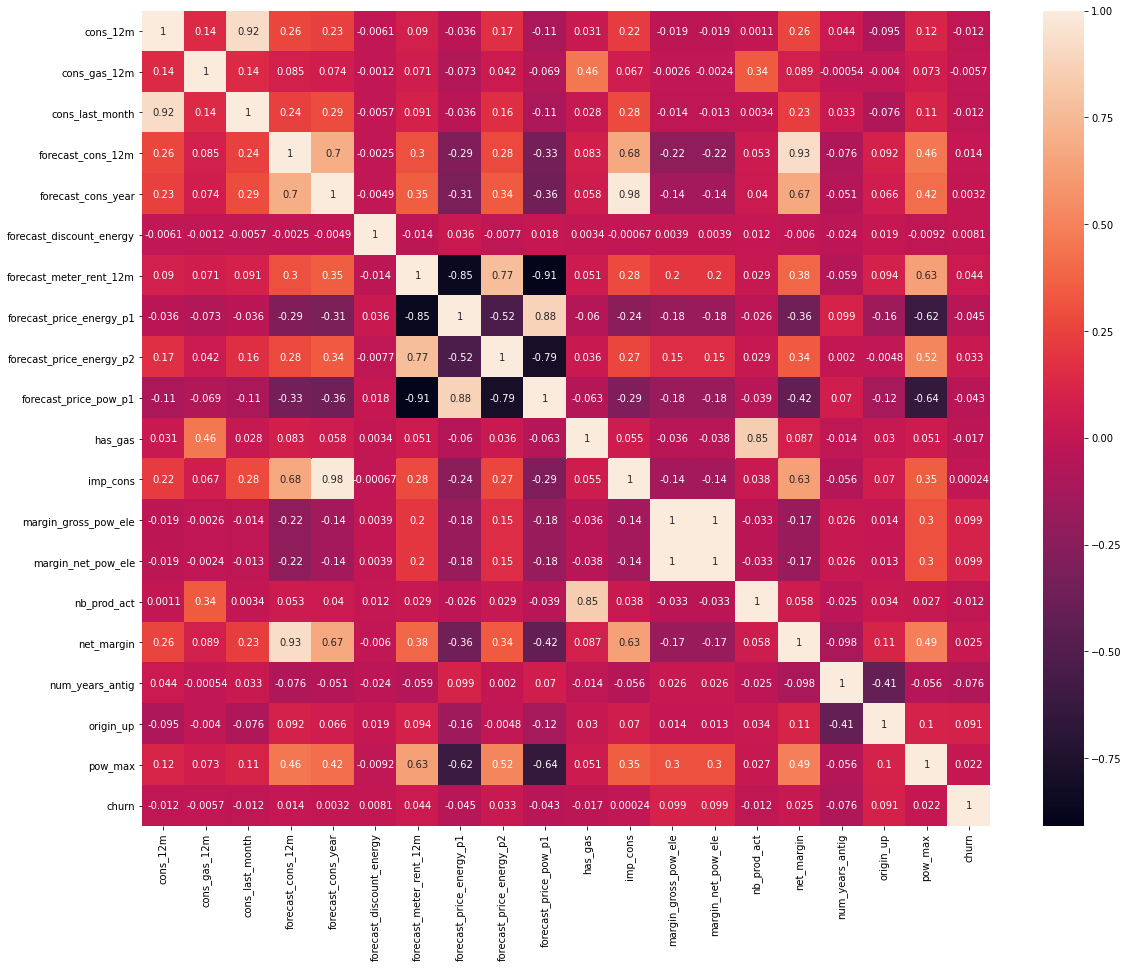

In [ ]:
# Plot correlation
correlation= df_final.corr()
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# separating numeric columns
df_numeric= df.select_dtypes(include=[np.number])
numeric_cols= df_numeric.columns.values
print(numeric_cols)

['cons_12m' 'cons_gas_12m' 'cons_last_month' 'forecast_cons_12m'
 'forecast_cons_year' 'forecast_discount_energy' 'forecast_meter_rent_12m'
 'forecast_price_energy_p1' 'forecast_price_energy_p2'
 'forecast_price_pow_p1' 'has_gas' 'imp_cons' 'margin_gross_pow_ele'
 'margin_net_pow_ele' 'nb_prod_act' 'net_margin' 'num_years_antig'
 'origin_up' 'pow_max' 'churn']


In [ ]:
X= df_numeric.drop('churn', axis=1)
y= df_numeric['churn']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(X_test, y_test)

0.9900368204461771

In [ ]:
y_pred= rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2327,   46],
       [   0, 2244]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2373
           1       0.98      1.00      0.99      2244

    accuracy                           0.99      4617
   macro avg       0.99      0.99      0.99      4617
weighted avg       0.99      0.99      0.99      4617

